1**. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.<br>
2*. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.<br>
3*. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).<br>
4*. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).<br>
5*. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.<br>
6*. Могла ли модель переобучиться? Почему?<br>
7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
def logit(x):
    """Sigmoid function."""

    return 1 / (1 + np.exp(-x))

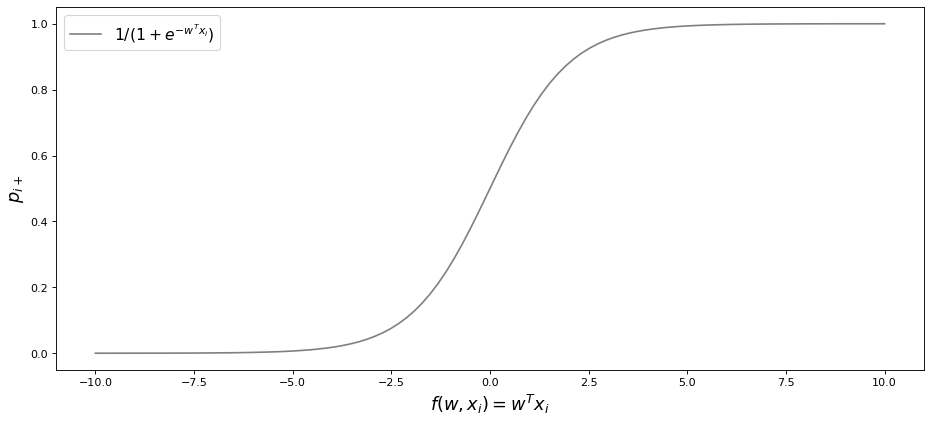

In [3]:
dots = np.linspace(-10, 10, 100)
logit_value = list(map(logit, dots))

fig, axes = plt.subplots(figsize = (14, 6), dpi=80)
plt.plot(dots, logit_value, color='grey', label='$ 1 / (1 + e^{-w^Tx_i})$')
plt.xlabel('$f(w, x_i) = w^Tx_i$', size=16)
plt.ylabel('$p_{i+}$', size=16)
plt.legend(prop={'size': 14})
plt.show()

In [4]:
def log_loss(w, X, y):
    m = X.shape[1]

    A = logit(np.dot(w.T, X))
    
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

In [5]:
classes = datasets.make_classification(n_samples=100,
                                       n_features=236,
                                       n_informative=23,
                                       n_redundant=0,
                                       n_classes=2,
                                       random_state=1)
dots = np.linspace(-1, 1, 1000)

In [6]:
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]
    
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)
    
X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 236)
Размер массива признаков тестовой выборки (30, 236)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [7]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [8]:
def eval_model(w, X, y, n_iterations, eta):
    """Logistic regression evaluation."""
    
    losses = []
    
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad
        
        losses.append(loss)
        
    return w, losses

### 2) Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [9]:
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 10000
eta = 0.05
w, losses = eval_model(w0, X_train_tr, y_train_tr, n_iterations, eta)

losses[-1]

0.0004578138018360489

In [10]:
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 100000
eta = 0.05
w, losses = eval_model(w0, X_train_tr, y_train_tr, n_iterations, eta)

losses[-1]

4.569500561509462e-05

In [11]:
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 100000
eta = 0.005
w, losses = eval_model(w0, X_train_tr, y_train_tr, n_iterations, eta)

losses[-1]

0.0004578972097203999

In [12]:
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 100000
eta = 0.0005
w, losses = eval_model(w0, X_train_tr, y_train_tr, n_iterations, eta)

losses[-1]

0.004652221246682257

In [13]:
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 100000
eta = 1
w, losses = eval_model(w0, X_train_tr, y_train_tr, n_iterations, eta)

losses[-1]

2.2839724200151225e-06

In [14]:
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 100000
eta = 3
w, losses = eval_model(w0, X_train_tr, y_train_tr, n_iterations, eta)

losses[-1]

<ipython-input-4-f9fe099f45a8>:6: RuntimeWarning: divide by zero encountered in log
  loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
<ipython-input-4-f9fe099f45a8>:6: RuntimeWarning: invalid value encountered in multiply
  loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))


nan

In [15]:
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 100000
eta = 1.5
w, losses = eval_model(w0, X_train_tr, y_train_tr, n_iterations, eta)

losses[-1]

1.5112214344736207e-06

### 3) Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [16]:
def calc_pred_proba(w, X):
    """Calculate predict probability."""
    
    return 1 / (1 + np.exp(-np.dot(X, w)))

In [17]:
y_pred_proba = calc_pred_proba(w, X_shuffled)

In [18]:
y_pred_proba

array([[1.27887504e-07],
       [5.19188093e-11],
       [5.72212909e-07],
       [1.63424167e-06],
       [3.49267062e-06],
       [9.99998254e-01],
       [9.99997627e-01],
       [9.99999982e-01],
       [1.25660298e-06],
       [9.99997582e-01],
       [9.99999655e-01],
       [9.99999121e-01],
       [9.99997583e-01],
       [4.32331402e-06],
       [9.99997677e-01],
       [9.99999378e-01],
       [9.99996303e-01],
       [9.99999359e-01],
       [9.99998418e-01],
       [3.21200358e-06],
       [3.47562539e-06],
       [4.25025919e-08],
       [9.99999021e-01],
       [2.07401629e-06],
       [9.99999807e-01],
       [9.99998238e-01],
       [4.65193627e-08],
       [9.99995797e-01],
       [9.99999938e-01],
       [8.02650475e-10],
       [9.99998074e-01],
       [9.99994750e-01],
       [2.03793330e-07],
       [9.99997035e-01],
       [1.00000000e+00],
       [1.14736925e-06],
       [2.06261917e-06],
       [1.53553171e-06],
       [3.33035577e-06],
       [9.75436948e-07],


### 4) Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [19]:
def calc_pred(w, X, treshold=0.5):
    """Predict calculation."""
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = logit(np.dot(w.T, X))
    
    for i in range(A.shape[1]):
        if A[:, i] > treshold:
            y_predicted[:, i] = 1
        elif A[:, i] <= treshold:
            y_predicted[:, i] = 0
            
    return y_predicted

### 5) Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [20]:
y_predicted_test = calc_pred(w, X_test_tr)
y_predicted_train = calc_pred(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Точность на обучающей выборке: 100.000
Точность на тестовой выборке: 66.667


In [21]:
def err_matrix(y_pred, y):
    """Error matrix evaluation."""
    
    matrix = [0, 0, 0, 0]
    
    if y_pred == y:
        if y == 1:
            true_pos_rate += 1
        else:
            true_neg_rate += 1

In [31]:
def eval_err_matrix(y_pred, y):
    """Error matrix evaluation."""
    
    matrix = np.array([0, 0, 0, 0])
    
    for i in range(len(y_pred[0])):
        if y_pred[0][i] == y[0][i]:
            if y[0][i] == 1:
                matrix[0] += 1
            else:
                matrix[3] += 1
        else:
            if y[0][i] == 1:
                matrix[1] += 1
            else:
                matrix[2] += 1
                
    return matrix.reshape(2, 2)

In [40]:
print('Матрица ошибок на тренировочной выборке')
train_err_matrix = pd.DataFrame(eval_err_matrix(y_predicted_train, y_train_tr))
train_err_matrix

Матрица ошибок на тренировочной выборке


,0,1
0,35,0
1,0,35


In [41]:
print('Матрица ошибок на тестовой выборке')
test_err_matrix = pd.DataFrame(eval_err_matrix(y_predicted_test, y_test_tr))
test_err_matrix

Матрица ошибок на тестовой выборке


,0,1
0,11,3
1,7,9


In [54]:
def eval_precision(true_pos, false_pos):
    """Precision evaluation."""
    
    return true_pos / (true_pos + false_pos)

In [55]:
train_precision = eval_precision(train_err_matrix[0][0], train_err_matrix[0][1])
test_precision = eval_precision(test_err_matrix[0][0], test_err_matrix[0][1])
print(f'Точность на тренировочной выборке: {train_precision:.3f}')
print(f'Точность на тестовой выборке: {test_precision:.3f}')

Точность на тренировочной выборке: 1.000
Точность на тестовой выборке: 0.611


In [56]:
def eval_recall(true_pos, false_neg):
    """Recall evaluation."""
    
    return true_pos / (true_pos + false_neg)

In [57]:
train_recall = eval_recall(train_err_matrix[0][0], train_err_matrix[1][0])
test_recall = eval_recall(test_err_matrix[0][0], test_err_matrix[1][0])
print(f'Полнота на тренировочной выборке: {train_recall:.3f}')
print(f'Полнота на тестовой выборке: {test_recall:.3f}')

Полнота на тренировочной выборке: 1.000
Полнота на тестовой выборке: 0.786


In [58]:
def f1_score(precision, recall, beta=1):
    """F1 score evaluation."""
    
    return (1 + beta) * precision * recall / (beta ** 2 * precision + recall)

In [61]:
print(f'F1-score на тренировочной выборке: {f1_score(train_precision, train_recall):.3f}')
print(f'F1-score на тренировочной выборке: {f1_score(test_precision, test_recall):.3f}')

F1-score на тренировочной выборке: 1.000
F1-score на тренировочной выборке: 0.688
